In [47]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [48]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [49]:
NUM_CLASSES = 5

# 入力長

In [50]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [51]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [52]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [54]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [55]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                792       
_________________________________________________________________
dropout_5 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 55        
Total params: 1,097
Trainable params: 1,097
Non-trainable params: 0
_________________________________________________________________


In [56]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [57]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [58]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/1 [==============================] - 1s 654ms/step - loss: 1.5943 - accuracy: 0.2407 - val_loss: 1.6122 - val_accuracy: 0.1081

Epoch 00001: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 2/1000
1/1 [==============================] - 0s 59ms/step - loss: 1.6104 - accuracy: 0.2685 - val_loss: 1.6094 - val_accuracy: 0.1351

Epoch 00002: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 3/1000
1/1 [==============================] - 0s 59ms/step - loss: 1.6164 - accuracy: 0.1852 - val_loss: 1.6071 - val_accuracy: 0.1081

Epoch 00003: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 4/1000
1/1 [==============================] - 0s 62ms/step - loss: 1.5889 - accuracy: 0.2685 - val_loss: 1.6048 - val_accuracy: 0.2162

Epoch 00004: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 5/1000
1/1 [==============================] - 0s 43ms/step - loss

1/1 [==============================] - 0s 57ms/step - loss: 1.5632 - accuracy: 0.2685 - val_loss: 1.5455 - val_accuracy: 0.3514

Epoch 00036: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 37/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.5458 - accuracy: 0.2963 - val_loss: 1.5439 - val_accuracy: 0.3514

Epoch 00037: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 38/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.5658 - accuracy: 0.3241 - val_loss: 1.5423 - val_accuracy: 0.3514

Epoch 00038: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 39/1000
1/1 [==============================] - 0s 57ms/step - loss: 1.5463 - accuracy: 0.2963 - val_loss: 1.5407 - val_accuracy: 0.3514

Epoch 00039: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 40/1000
1/1 [==============================] - 0s 59ms/step - loss: 1.5549 -

1/1 [==============================] - 0s 52ms/step - loss: 1.5143 - accuracy: 0.3056 - val_loss: 1.4794 - val_accuracy: 0.3514

Epoch 00071: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 72/1000
1/1 [==============================] - 0s 56ms/step - loss: 1.4981 - accuracy: 0.3056 - val_loss: 1.4775 - val_accuracy: 0.3514

Epoch 00072: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 73/1000
1/1 [==============================] - 0s 70ms/step - loss: 1.5119 - accuracy: 0.3148 - val_loss: 1.4756 - val_accuracy: 0.3514

Epoch 00073: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 74/1000
1/1 [==============================] - 0s 68ms/step - loss: 1.5034 - accuracy: 0.3056 - val_loss: 1.4737 - val_accuracy: 0.3514

Epoch 00074: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 75/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.5011 -

1/1 [==============================] - 0s 49ms/step - loss: 1.4528 - accuracy: 0.3148 - val_loss: 1.4105 - val_accuracy: 0.3514

Epoch 00106: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 107/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.4580 - accuracy: 0.2870 - val_loss: 1.4087 - val_accuracy: 0.3514

Epoch 00107: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 108/1000
1/1 [==============================] - 0s 69ms/step - loss: 1.4478 - accuracy: 0.3704 - val_loss: 1.4069 - val_accuracy: 0.3514

Epoch 00108: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 109/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.4573 - accuracy: 0.2778 - val_loss: 1.4052 - val_accuracy: 0.3514

Epoch 00109: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 110/1000
1/1 [==============================] - 0s 59ms/step - loss: 1.45

1/1 [==============================] - 0s 44ms/step - loss: 1.4040 - accuracy: 0.3611 - val_loss: 1.3409 - val_accuracy: 0.3514

Epoch 00141: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 142/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.3994 - accuracy: 0.3796 - val_loss: 1.3388 - val_accuracy: 0.3514

Epoch 00142: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 143/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.4175 - accuracy: 0.3519 - val_loss: 1.3368 - val_accuracy: 0.3514

Epoch 00143: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 144/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.3969 - accuracy: 0.4074 - val_loss: 1.3348 - val_accuracy: 0.3514

Epoch 00144: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 145/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.40

1/1 [==============================] - 0s 44ms/step - loss: 1.3637 - accuracy: 0.3889 - val_loss: 1.2662 - val_accuracy: 0.3514

Epoch 00176: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 177/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.3862 - accuracy: 0.4444 - val_loss: 1.2640 - val_accuracy: 0.3514

Epoch 00177: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 178/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.3429 - accuracy: 0.4444 - val_loss: 1.2617 - val_accuracy: 0.3514

Epoch 00178: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 179/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.3559 - accuracy: 0.4444 - val_loss: 1.2595 - val_accuracy: 0.3784

Epoch 00179: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 180/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.35

1/1 [==============================] - 0s 41ms/step - loss: 1.2845 - accuracy: 0.4352 - val_loss: 1.1806 - val_accuracy: 0.5946

Epoch 00211: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 212/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.2791 - accuracy: 0.4815 - val_loss: 1.1782 - val_accuracy: 0.6216

Epoch 00212: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 213/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.2887 - accuracy: 0.4167 - val_loss: 1.1758 - val_accuracy: 0.6216

Epoch 00213: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 214/1000
1/1 [==============================] - 0s 66ms/step - loss: 1.2970 - accuracy: 0.5185 - val_loss: 1.1736 - val_accuracy: 0.6216

Epoch 00214: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 215/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.29

1/1 [==============================] - 0s 43ms/step - loss: 1.2545 - accuracy: 0.5000 - val_loss: 1.1079 - val_accuracy: 0.7568

Epoch 00246: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 247/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.2309 - accuracy: 0.5741 - val_loss: 1.1059 - val_accuracy: 0.7568

Epoch 00247: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 248/1000
1/1 [==============================] - 0s 64ms/step - loss: 1.2327 - accuracy: 0.4907 - val_loss: 1.1040 - val_accuracy: 0.7568

Epoch 00248: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 249/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.2301 - accuracy: 0.4907 - val_loss: 1.1021 - val_accuracy: 0.7568

Epoch 00249: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 250/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.22

1/1 [==============================] - 0s 45ms/step - loss: 1.1932 - accuracy: 0.5556 - val_loss: 1.0258 - val_accuracy: 0.7568

Epoch 00281: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 282/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.1531 - accuracy: 0.5741 - val_loss: 1.0232 - val_accuracy: 0.7568

Epoch 00282: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 283/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.1626 - accuracy: 0.6019 - val_loss: 1.0206 - val_accuracy: 0.7568

Epoch 00283: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 284/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.1611 - accuracy: 0.5741 - val_loss: 1.0181 - val_accuracy: 0.7568

Epoch 00284: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 285/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.13

1/1 [==============================] - 0s 45ms/step - loss: 1.0799 - accuracy: 0.6759 - val_loss: 0.9415 - val_accuracy: 0.8378

Epoch 00316: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 317/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.1487 - accuracy: 0.6019 - val_loss: 0.9391 - val_accuracy: 0.8378

Epoch 00317: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 318/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.1042 - accuracy: 0.6111 - val_loss: 0.9369 - val_accuracy: 0.8378

Epoch 00318: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 319/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.0636 - accuracy: 0.6852 - val_loss: 0.9346 - val_accuracy: 0.8378

Epoch 00319: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 320/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.07

1/1 [==============================] - 0s 46ms/step - loss: 1.1425 - accuracy: 0.6111 - val_loss: 0.8638 - val_accuracy: 0.8919

Epoch 00351: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 352/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.0508 - accuracy: 0.6389 - val_loss: 0.8616 - val_accuracy: 0.8919

Epoch 00352: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 353/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.0747 - accuracy: 0.6481 - val_loss: 0.8592 - val_accuracy: 0.8919

Epoch 00353: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 354/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.0129 - accuracy: 0.7037 - val_loss: 0.8569 - val_accuracy: 0.8919

Epoch 00354: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 355/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.02

1/1 [==============================] - 0s 42ms/step - loss: 1.0374 - accuracy: 0.7500 - val_loss: 0.7923 - val_accuracy: 0.9730

Epoch 00386: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 387/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.9768 - accuracy: 0.6944 - val_loss: 0.7906 - val_accuracy: 0.9730

Epoch 00387: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 388/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.0765 - accuracy: 0.6389 - val_loss: 0.7890 - val_accuracy: 0.9730

Epoch 00388: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 389/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.9796 - accuracy: 0.7037 - val_loss: 0.7873 - val_accuracy: 0.9730

Epoch 00389: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 390/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.02

1/1 [==============================] - 0s 44ms/step - loss: 0.9362 - accuracy: 0.7685 - val_loss: 0.7336 - val_accuracy: 0.9459

Epoch 00421: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 422/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.9906 - accuracy: 0.6667 - val_loss: 0.7322 - val_accuracy: 0.9459

Epoch 00422: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 423/1000
1/1 [==============================] - 0s 60ms/step - loss: 0.8941 - accuracy: 0.7500 - val_loss: 0.7309 - val_accuracy: 0.9459

Epoch 00423: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 424/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.9891 - accuracy: 0.7130 - val_loss: 0.7296 - val_accuracy: 0.9459

Epoch 00424: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 425/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.97

1/1 [==============================] - 0s 47ms/step - loss: 0.9183 - accuracy: 0.6481 - val_loss: 0.6788 - val_accuracy: 0.9459

Epoch 00456: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 457/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.9083 - accuracy: 0.7222 - val_loss: 0.6776 - val_accuracy: 0.9459

Epoch 00457: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 458/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.8360 - accuracy: 0.7778 - val_loss: 0.6762 - val_accuracy: 0.9459

Epoch 00458: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 459/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.0263 - accuracy: 0.6574 - val_loss: 0.6754 - val_accuracy: 0.9459

Epoch 00459: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 460/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.86

1/1 [==============================] - 0s 55ms/step - loss: 0.9080 - accuracy: 0.7315 - val_loss: 0.6242 - val_accuracy: 0.9459

Epoch 00491: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 492/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.9387 - accuracy: 0.6759 - val_loss: 0.6227 - val_accuracy: 0.9459

Epoch 00492: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 493/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.9909 - accuracy: 0.7500 - val_loss: 0.6215 - val_accuracy: 0.9459

Epoch 00493: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 494/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.8626 - accuracy: 0.7407 - val_loss: 0.6200 - val_accuracy: 0.9459

Epoch 00494: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 495/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.85

1/1 [==============================] - 0s 43ms/step - loss: 0.8850 - accuracy: 0.7500 - val_loss: 0.5815 - val_accuracy: 0.9459

Epoch 00526: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 527/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.8680 - accuracy: 0.7130 - val_loss: 0.5815 - val_accuracy: 0.9459

Epoch 00527: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 528/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.9075 - accuracy: 0.7130 - val_loss: 0.5818 - val_accuracy: 0.9459

Epoch 00528: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 529/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.8670 - accuracy: 0.7593 - val_loss: 0.5819 - val_accuracy: 0.9459

Epoch 00529: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 530/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.83

1/1 [==============================] - 0s 52ms/step - loss: 0.7624 - accuracy: 0.7963 - val_loss: 0.5469 - val_accuracy: 0.9459

Epoch 00561: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 562/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.8653 - accuracy: 0.7500 - val_loss: 0.5450 - val_accuracy: 0.9459

Epoch 00562: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 563/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.7931 - accuracy: 0.7870 - val_loss: 0.5429 - val_accuracy: 0.9459

Epoch 00563: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 564/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.7930 - accuracy: 0.7315 - val_loss: 0.5409 - val_accuracy: 0.9459

Epoch 00564: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 565/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.83

1/1 [==============================] - 0s 58ms/step - loss: 0.8172 - accuracy: 0.7778 - val_loss: 0.5076 - val_accuracy: 0.9459

Epoch 00596: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 597/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.7150 - accuracy: 0.7593 - val_loss: 0.5059 - val_accuracy: 0.9459

Epoch 00597: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 598/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.7589 - accuracy: 0.7963 - val_loss: 0.5043 - val_accuracy: 0.9459

Epoch 00598: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 599/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.7998 - accuracy: 0.7685 - val_loss: 0.5028 - val_accuracy: 0.9459

Epoch 00599: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 600/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.80

1/1 [==============================] - 0s 44ms/step - loss: 0.7091 - accuracy: 0.7593 - val_loss: 0.4794 - val_accuracy: 0.9459

Epoch 00631: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 632/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.8141 - accuracy: 0.7963 - val_loss: 0.4793 - val_accuracy: 0.9459

Epoch 00632: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 633/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.7672 - accuracy: 0.7778 - val_loss: 0.4789 - val_accuracy: 0.9459

Epoch 00633: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 634/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.8132 - accuracy: 0.7222 - val_loss: 0.4788 - val_accuracy: 0.9459

Epoch 00634: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 635/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.74

1/1 [==============================] - 0s 58ms/step - loss: 0.7177 - accuracy: 0.7870 - val_loss: 0.4555 - val_accuracy: 0.9459

Epoch 00666: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 667/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.8222 - accuracy: 0.7593 - val_loss: 0.4557 - val_accuracy: 0.9459

Epoch 00667: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 668/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.7609 - accuracy: 0.8148 - val_loss: 0.4554 - val_accuracy: 0.9459

Epoch 00668: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 669/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.7653 - accuracy: 0.7685 - val_loss: 0.4549 - val_accuracy: 0.9459

Epoch 00669: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 670/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.75

1/1 [==============================] - 0s 46ms/step - loss: 0.6426 - accuracy: 0.7963 - val_loss: 0.4425 - val_accuracy: 0.9459

Epoch 00701: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 702/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.7085 - accuracy: 0.7778 - val_loss: 0.4420 - val_accuracy: 0.9459

Epoch 00702: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 703/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.7531 - accuracy: 0.7593 - val_loss: 0.4413 - val_accuracy: 0.9459

Epoch 00703: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 704/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.8164 - accuracy: 0.7500 - val_loss: 0.4404 - val_accuracy: 0.9459

Epoch 00704: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 705/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.70

1/1 [==============================] - 0s 48ms/step - loss: 0.6966 - accuracy: 0.8056 - val_loss: 0.4119 - val_accuracy: 0.9459

Epoch 00736: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 737/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.7191 - accuracy: 0.7593 - val_loss: 0.4116 - val_accuracy: 0.9459

Epoch 00737: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 738/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.6612 - accuracy: 0.8148 - val_loss: 0.4113 - val_accuracy: 0.9459

Epoch 00738: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 739/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.6990 - accuracy: 0.8056 - val_loss: 0.4109 - val_accuracy: 0.9459

Epoch 00739: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 740/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.74

1/1 [==============================] - 0s 43ms/step - loss: 0.7381 - accuracy: 0.8148 - val_loss: 0.4003 - val_accuracy: 0.9459

Epoch 00771: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 772/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.7186 - accuracy: 0.7963 - val_loss: 0.3997 - val_accuracy: 0.9459

Epoch 00772: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 773/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.7274 - accuracy: 0.7685 - val_loss: 0.3994 - val_accuracy: 0.9459

Epoch 00773: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 774/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.7156 - accuracy: 0.7593 - val_loss: 0.3993 - val_accuracy: 0.9459

Epoch 00774: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 775/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.68

1/1 [==============================] - 0s 44ms/step - loss: 0.6248 - accuracy: 0.7870 - val_loss: 0.3947 - val_accuracy: 0.9459

Epoch 00806: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 807/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.7021 - accuracy: 0.7593 - val_loss: 0.3929 - val_accuracy: 0.9459

Epoch 00807: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 808/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.8342 - accuracy: 0.7778 - val_loss: 0.3910 - val_accuracy: 0.9459

Epoch 00808: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 809/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.7355 - accuracy: 0.7778 - val_loss: 0.3895 - val_accuracy: 0.9459

Epoch 00809: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 810/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.62

1/1 [==============================] - 0s 48ms/step - loss: 0.6298 - accuracy: 0.7870 - val_loss: 0.3865 - val_accuracy: 0.9459

Epoch 00841: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 842/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.6876 - accuracy: 0.7685 - val_loss: 0.3866 - val_accuracy: 0.9459

Epoch 00842: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 843/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.7034 - accuracy: 0.7593 - val_loss: 0.3867 - val_accuracy: 0.9459

Epoch 00843: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 844/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.6847 - accuracy: 0.7685 - val_loss: 0.3867 - val_accuracy: 0.9459

Epoch 00844: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 845/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.65

In [59]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [60]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[0.23665291 0.14626366 0.01939424 0.5870224  0.01066684]
3


# 混同行列

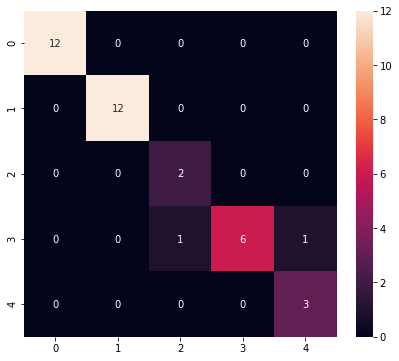

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       0.67      1.00      0.80         2
           3       1.00      0.75      0.86         8
           4       0.75      1.00      0.86         3

    accuracy                           0.95        37
   macro avg       0.88      0.95      0.90        37
weighted avg       0.96      0.95      0.95        37



In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [62]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [63]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [64]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\kibas\AppData\Local\Temp\tmpa6jwutir\assets


INFO:tensorflow:Assets written to: C:\Users\kibas\AppData\Local\Temp\tmpa6jwutir\assets


6336

# 推論テスト

In [65]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [66]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'input_3', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [67]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [68]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [69]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.23665291 0.14626366 0.01939424 0.58702236 0.01066684]
3
